# Cross-link 2407-dataset

The dataset has the cross-link maps per detector in $N_{\rm side}=128$ in HDF5 format.
The configration of the simulation as follows:

- Sampling rate: 19 Hz
- Considered spin number $n$: 1 to 5
- No HWP (so it doesn't have spin-$m$ in the following discription)
- Directory structure:
  - Channel names (22 bands)
    - Detector names (Only `Top` detector, total number of files: 4508/2)
    - Naming rule: `nside{xxx}_{detname}.h5`
  - Boresight


In [1]:
import h5py
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Definision of cross-link

We define the cross-link as:
$$ {}_{n,m}\tilde{h}= \frac{1}{N_{\rm hits}}\sum_{j}e^{-i(n\psi_j + m \phi_j)}$$
where $\psi$ and $\phi$ represent crossing/HWP angle, respectively, and $j$ represents $j^{\rm{th}}$ measurement in a sky pixel. $N_{\rm hits}$ represents number of hits in a sky pixel.

You can get the value of it by `get_xlink(data, spin_n)` with specified spin number. In the 2407-dataset, you can acsess spin 1 to 5.


In [2]:
def get_data(path):
    """Get data from a crosslink file
    Args:
        path (str): path to the crosslink file

    return:
        dict: dictionary containing crosslink data
            `ss`: Scanning strategy data
            `n`: considered spin number (for crossing angle)
            `m`: considered spin number (for HWP angle)
            `mean`: mean of the [hitmap, cross-link map(n=1), cross-link map(n=2), ...]
            `std`: standard deviation of the [hitmap, cross-link map(n=1), cross-link map(n=2), ...]
            `hitmap` (1d-array): Hit-map
            `hmap` ([npix,m,n]): Cross-link map
    """
    with h5py.File(path, 'r') as f:
        ss_group = f['ss']
        ss = {}
        for key, value in zip(ss_group.keys(), ss_group.values()):
            if key=="quat":
                key
            else:
                ss[key] = value[()]
        hitmap = f['hitmap'][:]
        hmap = f['h'][:]
        quantify_group = f['quantify']
        n = quantify_group['n'][()]
        m = quantify_group['m'][()]
        mean = quantify_group['mean'][()]
        std = quantify_group['std'][()]
        return {"ss":ss, "n":n, "m":m, "mean":mean, "std":std, "hitmap":hitmap, "hmap":hmap}

def get_xlink(data, spin_n):
    """ Get crosslink data for a specific spin
    Args:
        data (dict): dictionary containing crosslink data
        spin_n (int): spin number
    """
    assert spin_n > 0, "spin_n must be greater than 0"
    return data["hmap"][:,0,spin_n-1]

def t2b(data, spin_n):
    """Transform Top detector cross-link to Bottom detector cross-link
    Top and bottom detector make a orthogonal pair.
    """
    return get_xlink(data, spin_n) * np.exp(-1j*spin_n*(np.pi/2))

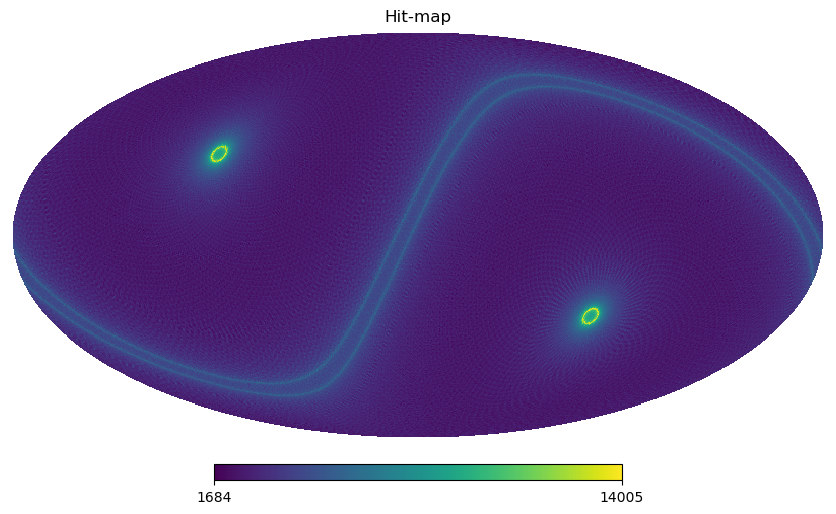

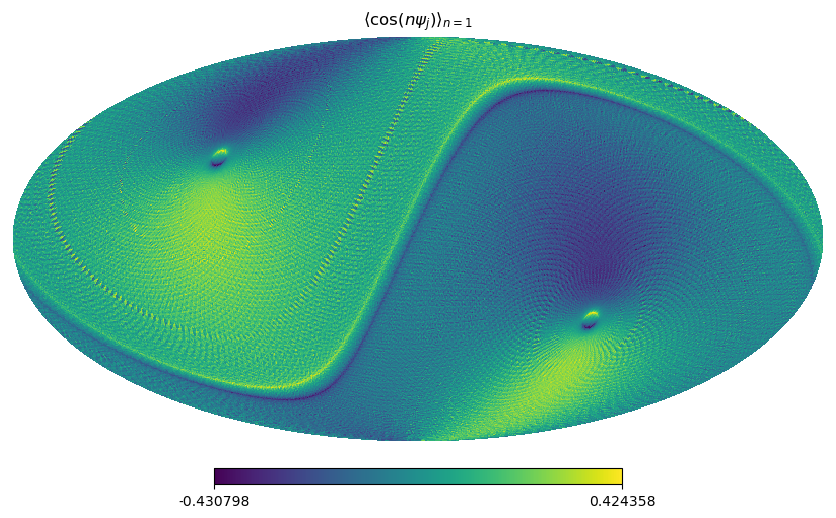

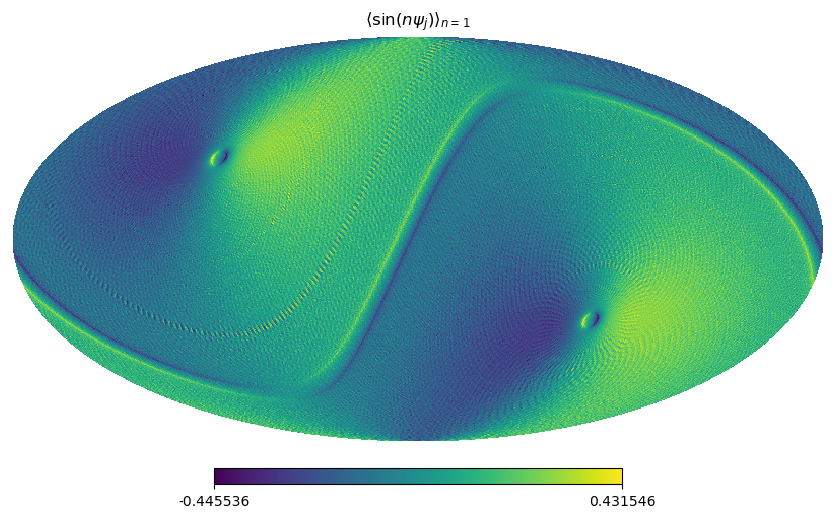

In [3]:
path = "../crosslinks_2407/L1-040/nside128_000_000_003_QA_040_T.h5"
data = get_data(path)
spin_n = 1
hp.mollview(data["hitmap"], title="Hit-map")
hp.mollview(get_xlink(data, spin_n).real, title=r"$\langle \cos(n\psi_j)\rangle_{n=}$" + f"$_{spin_n}$")
hp.mollview(get_xlink(data, spin_n).imag, title=r"$\langle \sin(n\psi_j)\rangle_{n=}$" + f"$_{spin_n}$")

## Note that few MHFT detectors cannot observe the ecliptic poles as bellow: 

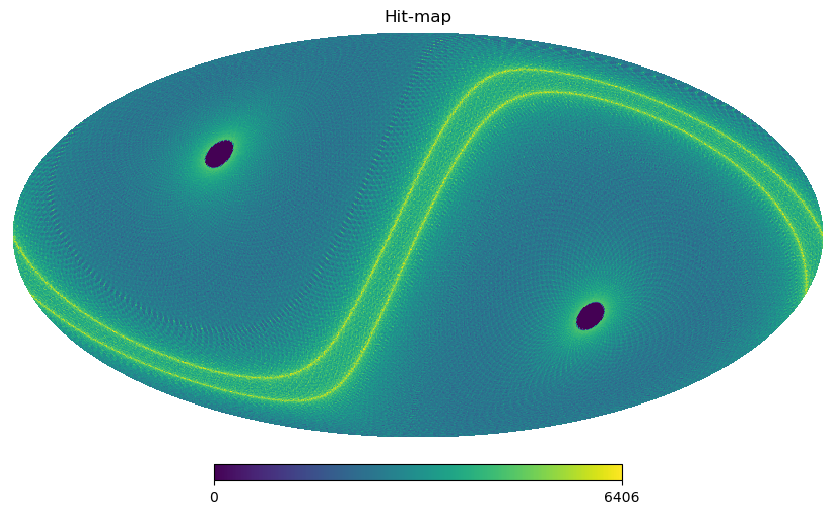

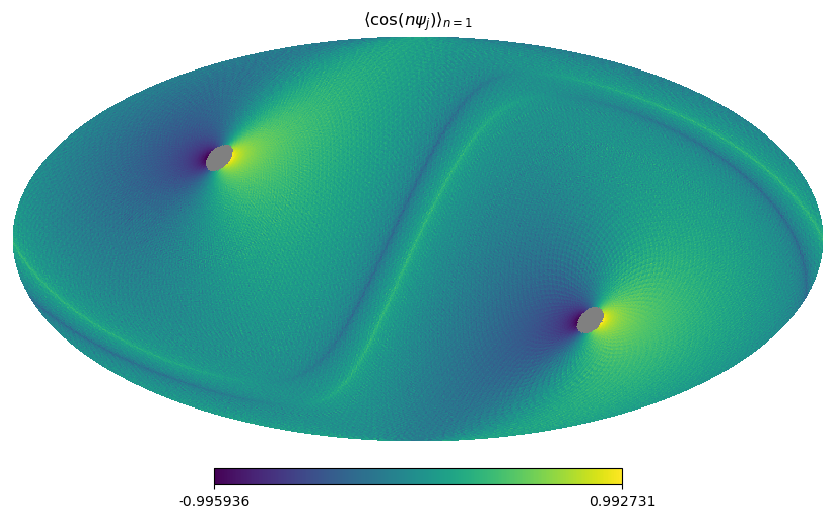

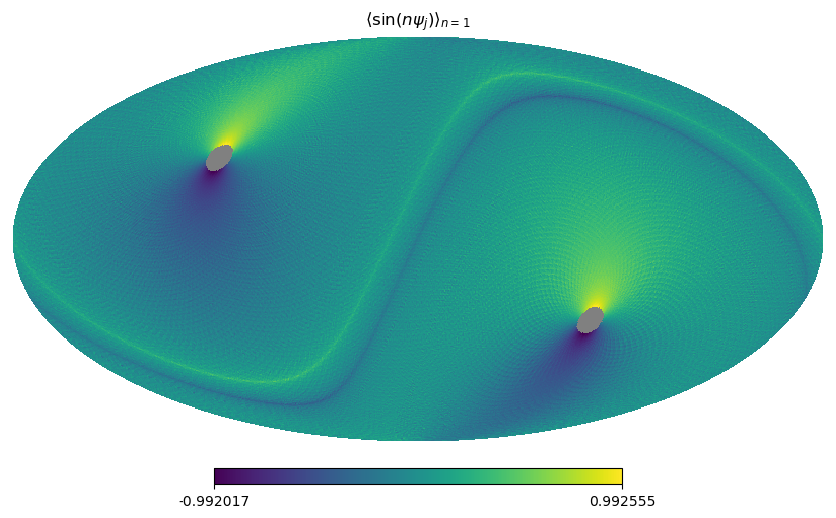

In [5]:
path = "../crosslinks_2407/H1-195/nside128_002_000_000_Q_195_T.h5"
data = get_data(path)
spin_n = 1
hp.mollview(data["hitmap"], title="Hit-map")
hp.mollview(get_xlink(data, spin_n).real, title=r"$\langle \cos(n\psi_j)\rangle_{n=}$" + f"$_{spin_n}$")
hp.mollview(get_xlink(data, spin_n).imag, title=r"$\langle \sin(n\psi_j)\rangle_{n=}$" + f"$_{spin_n}$")